Hosts inicializados
Canais inicializados
Pares EPRs adicionados


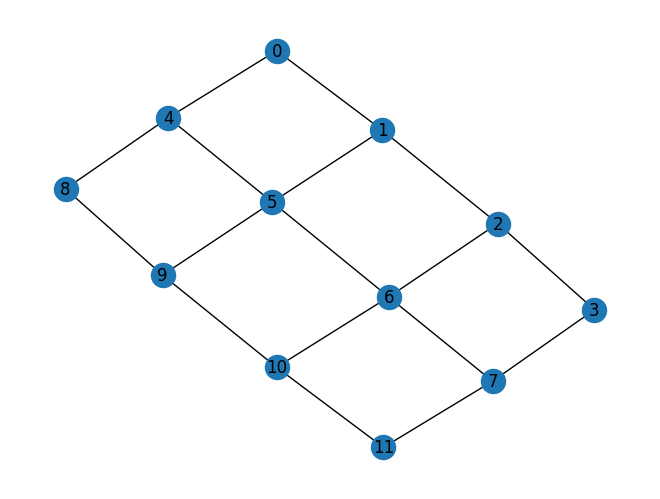

In [1]:
from quantumnet.components import Controller, Network
rede = Network()
controlador = Controller(rede)
row, col = 3, 4
rede.set_ready_topology("Grade", row, col)
rede.draw()

In [2]:
import random

def generate_random_request(num_hosts, fmin_range=(0.5, 1.0), eprs_range=(1, 10)):
    """
    Gera uma request aleatória para a rede quântica.

    Args:
        num_hosts (int): Número total de hosts na rede.
        fmin_range (tuple): Intervalo para o valor mínimo de fidelidade (fmin).
        eprs_range (tuple): Intervalo para o número de pares EPR requeridos.

    Returns:
        list: Uma request no formato [alice_id, bob_id, fmin, eprs].
    """
    alice_id = random.randint(0, num_hosts - 1)
    bob_id = random.randint(0, num_hosts - 1)

    # Garantir que Alice e Bob não sejam o mesmo host
    while bob_id == alice_id:
        bob_id = random.randint(0, num_hosts - 1)

    fmin = round(random.uniform(*fmin_range), 2)  
    eprs = random.randint(*eprs_range)            

    return [alice_id, bob_id, fmin, eprs]

random_request = generate_random_request(num_hosts=10)
print(random_request)


[9, 6, 0.68, 1]


In [3]:
all_requests = []
for i in range(100):
    request = generate_random_request(num_hosts=10)
    all_requests.append(request)
print(all_requests)

[[3, 6, 0.75, 4], [3, 5, 0.64, 1], [3, 8, 0.85, 4], [2, 3, 0.82, 8], [7, 8, 0.77, 4], [5, 8, 0.74, 7], [1, 5, 0.86, 10], [0, 5, 0.57, 7], [4, 3, 0.8, 8], [6, 7, 0.64, 8], [1, 8, 0.53, 2], [9, 7, 0.55, 7], [2, 4, 0.68, 10], [4, 6, 0.81, 3], [6, 1, 0.83, 4], [8, 9, 0.63, 4], [6, 5, 0.91, 6], [6, 0, 0.83, 8], [5, 8, 0.62, 7], [0, 4, 0.51, 8], [4, 3, 0.66, 9], [9, 6, 0.92, 2], [5, 9, 0.78, 4], [6, 7, 0.67, 5], [3, 4, 0.79, 9], [5, 8, 0.83, 3], [3, 4, 0.54, 7], [5, 2, 0.92, 7], [5, 3, 0.78, 3], [2, 8, 0.72, 3], [8, 7, 0.69, 6], [4, 6, 0.7, 3], [8, 6, 0.75, 10], [4, 2, 0.68, 5], [4, 0, 0.52, 9], [5, 7, 0.76, 10], [0, 4, 0.74, 9], [9, 2, 0.66, 7], [7, 1, 0.89, 9], [8, 5, 0.79, 6], [2, 6, 0.93, 5], [6, 8, 0.75, 2], [1, 7, 0.9, 8], [8, 5, 0.62, 3], [4, 3, 0.82, 4], [2, 4, 0.65, 4], [5, 9, 0.84, 3], [8, 5, 0.56, 2], [7, 3, 0.91, 3], [1, 2, 0.85, 6], [4, 6, 0.98, 5], [8, 7, 0.98, 10], [8, 7, 0.88, 8], [0, 5, 0.78, 4], [0, 6, 0.54, 4], [9, 2, 0.93, 3], [2, 5, 0.95, 2], [0, 2, 0.77, 4], [7, 5, 0.76

In [4]:
# Percorrer todas as requests
for request in all_requests:
    print(f"Request analisada: {request}")
    alice = rede.get_host(request[0])
    rule = alice.find_rule_by_request(request)
    if rule == False:
        print("Regra não encontrada")
        controlador.add_match_route_rule_in_host(request, alice)
    else:
        print("Regra encontrada")
        print(rule)
        controlador.run_rule(rule[1])

Request analisada: [3, 6, 0.75, 4]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [3, 5, 0.64, 1]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [3, 8, 0.85, 4]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [2, 3, 0.82, 8]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [7, 8, 0.77, 4]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [5, 8, 0.74, 7]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [1, 5, 0.86, 10]
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
Request analisada: [0, 5, 

In [5]:
# Percorrer todas as requests
for request in all_requests:
    print(f"Request analisada: {request}")
    alice = rede.get_host(request[0])
    print(alice.flow_table)
    rule = alice.find_rule_by_request(request)
    if rule == False:
        print("Regra não encontrada")
        controlador.add_match_route_rule_in_host(request, alice)
        controlador.run_rule(rule)
    else:
        print("Regra encontrada")
        print(rule)
        controlador.run_rule(rule[1])

Request analisada: [3, 6, 0.75, 4]
{(6, 0.75, 4): ([3, 2, 6], BasicRule), (5, 0.64, 1): ([3, 2, 1, 5], BasicRule), (8, 0.85, 4): ([3, 2, 1, 0, 4, 8], BasicRule), (4, 0.79, 9): ([3, 2, 1, 0, 4], BasicRule), (2, 0.87, 7): ([3, 2], BasicRule), (5, 0.9, 2): ([3, 1, 5], HighFidelityRoule)}
Regra encontrada
([3, 2, 6], BasicRule)
Tempo: 1
Tempo: 2
Executando ação: Swap(3-2-6)
Running Swap(3-2-6)
Entanglement Swapping entre 3 e 6 foi bem-sucedido.
Request analisada: [3, 5, 0.64, 1]
{(6, 0.75, 4): ([3, 2, 6], BasicRule), (5, 0.64, 1): ([3, 2, 1, 5], BasicRule), (8, 0.85, 4): ([3, 2, 1, 0, 4, 8], BasicRule), (4, 0.79, 9): ([3, 2, 1, 0, 4], BasicRule), (2, 0.87, 7): ([3, 2], BasicRule), (5, 0.9, 2): ([3, 1, 5], HighFidelityRoule)}
Regra encontrada
([3, 2, 1, 5], BasicRule)
Tempo: 1
Tempo: 2
Executando ação: Swap(3-2-1)
Running Swap(3-2-1)
Entanglement Swapping entre 3 e 1 foi bem-sucedido.
Request analisada: [3, 8, 0.85, 4]
{(6, 0.75, 4): ([3, 2, 6], BasicRule), (5, 0.64, 1): ([3, 2, 1, 5], Basi